In [1]:
import mlflow
from mlflow.tracking import client
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from analysis.utils import select_experiment, select_run, plot_dataset

In [2]:
test_exp_name = select_experiment()
test_exp = mlflow.get_experiment_by_name(test_exp_name)
test_exp_id = test_exp.experiment_id

/home/ag7531/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6 :  multiregion
17 :  meeting22july
15 :  datacm21
3 :  multiregions
19 :  data-global
14 :  forcingdatav3
2 :  training
4 :  default
7 :  Unet
18 :  forcing-data-global
12 :  test
9 :  forcingdata1pct
5 :  regionsfortraining
20 :  test_global
8 :  arctan
16 :  meeting15july
13 :  forcingdatav2
Select the id of an experiment: 20


In [3]:
run = select_run(experiment_ids=test_exp_id)

                             run_id experiment_id
0  e3c67bee07ab4cfd9a1d9721f6b56410            20
1  0d10f8c7adb14b938e80d1d1d9481042            20
2  705929e56cd542af9ace6ef464e80a13            20
3  d7353eb4c04b4c33a249308f332c16af            20
4  0640a02589a04092952557b9c0c25bf4            20
5  e196caa242d24949a24903434e638126            20
6  df377405e36a45bdb61abb8a6895cc4e            20
Run id?0


In [4]:
run

/home/ag7531/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


run_id                                            e3c67bee07ab4cfd9a1d9721f6b56410
experiment_id                                                                   20
status                                                                    FINISHED
artifact_uri                     /scratch/ag7531/mlruns/20/e3c67bee07ab4cfd9a1d...
start_time                                        2020-10-03 17:13:20.416000+00:00
end_time                                          2020-10-03 18:45:12.920000+00:00
metrics.validation loss                                                          0
params.data_run_id                                38491825c56c4c8c8afbf5286ce59c7c
params.n_epochs                                                                  0
params.model_run_id                               2370107146564198b9f7351036632770
tags.mlflow.source.git.commit             ecd9a8da9b41101e798ccd3b5429d3693feb2028
tags.mlflow.source.type                                                      LOCAL
tags

In [17]:
client_ = client.MlflowClient()
data_file_name = client_.download_artifacts(run['params.data_run_id'], 'forcing')
print(data_file_name)
data = xr.open_zarr(data_file)

/scratch/ag7531/mlruns/18/a06e42d44402481eb3a8f9e705770950/artifacts/forcing


In [18]:
data

<xarray.Dataset>
Dimensions:   (time: 4400, xu_ocean: 900, yu_ocean: 378)
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0193-01-17 12:00:00
  * xu_ocean  (xu_ocean) float64 -279.7 -279.3 -278.9 ... 79.05 79.45 79.85
  * yu_ocean  (yu_ocean) float64 -59.95 -59.75 -59.54 -59.34 ... 59.59 59.8 60.0
Data variables:
    S_x       (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(25, 378, 900), meta=np.ndarray>
    S_y       (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(25, 378, 900), meta=np.ndarray>
    usurf     (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(25, 378, 900), meta=np.ndarray>
    vsurf     (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(25, 378, 900), meta=np.ndarray>

In [20]:
pred_file_name = client_.download_artifacts(run.run_id, 'test_output_0')
pred = xr.open_zarr(pred_file_name)

In [23]:
merged = xr.merge((data, pred))

In [24]:
merged

<xarray.Dataset>
Dimensions:    (latitude: 358, longitude: 880, time: 4400, xu_ocean: 900, yu_ocean: 378)
Coordinates:
  * time       (time) object 0181-01-01 12:00:00 ... 0193-01-17 12:00:00
  * xu_ocean   (xu_ocean) float64 -279.7 -279.3 -278.9 ... 79.05 79.45 79.85
  * yu_ocean   (yu_ocean) float64 -59.95 -59.75 -59.54 ... 59.59 59.8 60.0
  * latitude   (latitude) float64 -57.88 -57.67 -57.45 ... 57.51 57.72 57.94
  * longitude  (longitude) float64 -275.7 -275.3 -274.9 ... 75.05 75.45 75.85
Data variables:
    S_x        (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(25, 378, 900), meta=np.ndarray>
    S_y        (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(25, 378, 900), meta=np.ndarray>
    usurf      (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(25, 378, 900), meta=np.ndarray>
    vsurf      (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(25, 378, 900), meta=np.ndarray>
    S_xpred    (time, latitude, longitude) float64 dask.array<chunksize=(5, 358, 880), meta=np.ndarray>
    S_xscale   (time, latitude, longitude) float64 dask.array<chunksize=(5, 358, 880), meta=np.ndarray>
    S_ypred    (time, latitude, longitude) float64 dask.array<chunksize=(5, 358, 880), meta=np.ndarray>
    S_yscale   (time, latitude, longitude) float64 dask.array<chunksize=(5, 358, 880), meta=np.ndarray>

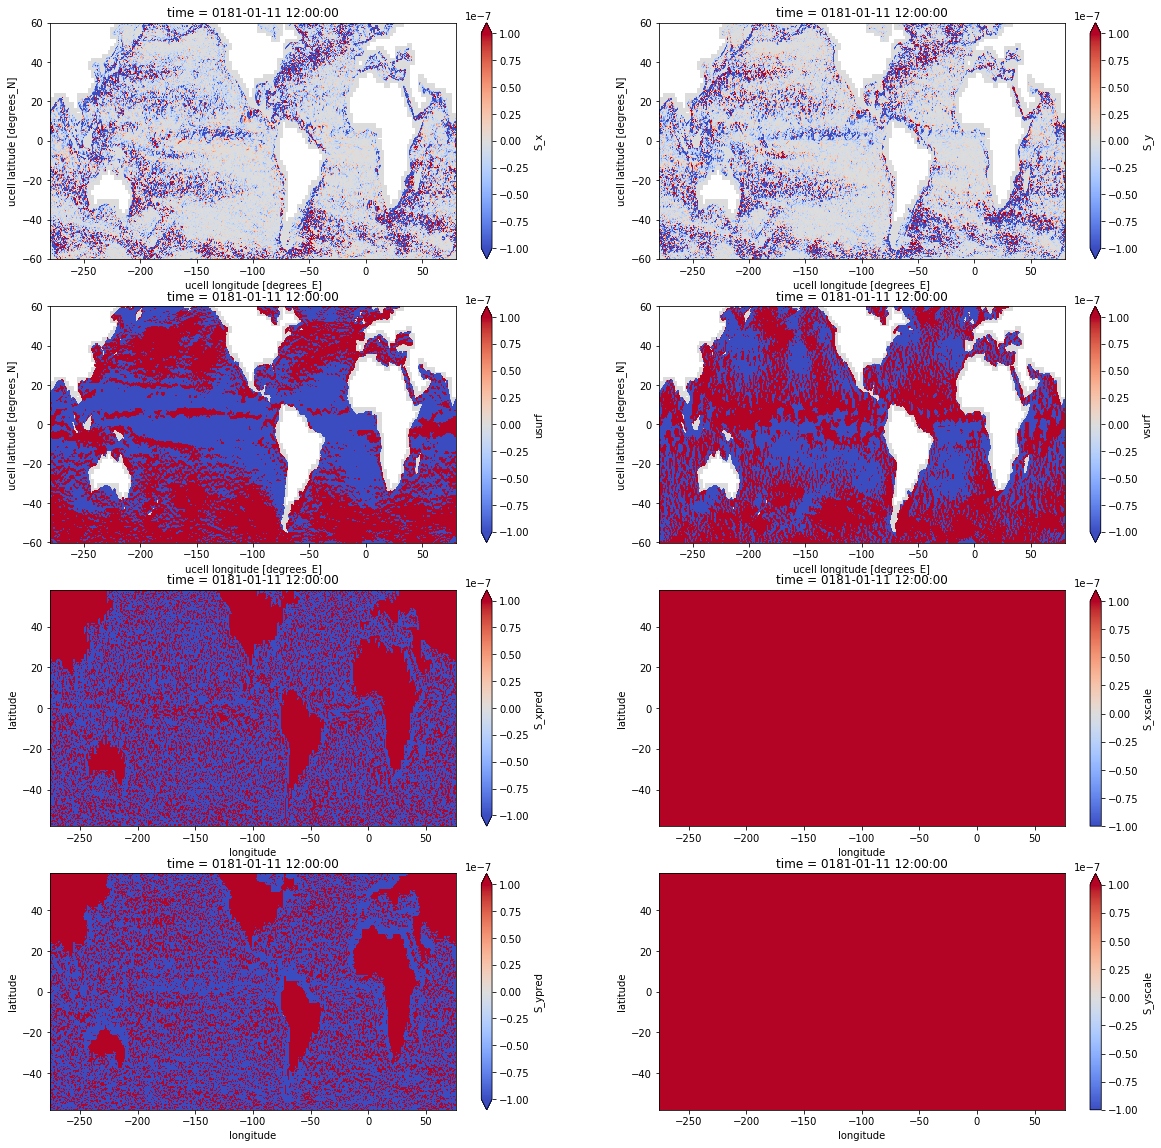

In [27]:
plot_dataset(merged.isel(time=10), vmin=-1e-7, vmax=1e-7)